# Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc


# Loading Dataset

In [ ]:
# Define column names since the dataset lacks headers
column_names = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI",
                "DiabetesPedigreeFunction", "Age", "Outcome"]

# Load the dataset with column names
df = pd.read_csv("https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv",
                 names=column_names)

# Display first few rows
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Short Description about Data

In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Adding BMI categories

In [ ]:
# Add BMI categories
df['BMI_Category'] = pd.cut(df['BMI'], bins=[0, 18.5, 25, 30, np.inf],
                            labels=['Underweight', 'Normal', 'Overweight', 'Obese'])

# Convert categorical feature to numeric
df = pd.get_dummies(df, columns=['BMI_Category'], drop_first=True)

# Show updated dataset
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BMI_Category_Normal,BMI_Category_Overweight,BMI_Category_Obese
0,6,148,72,35,0,33.6,0.627,50,1,False,False,True
1,1,85,66,29,0,26.6,0.351,31,0,False,True,False
2,8,183,64,0,0,23.3,0.672,32,1,True,False,False
3,1,89,66,23,94,28.1,0.167,21,0,False,True,False
4,0,137,40,35,168,43.1,2.288,33,1,False,False,True


# Age vs Diabetes

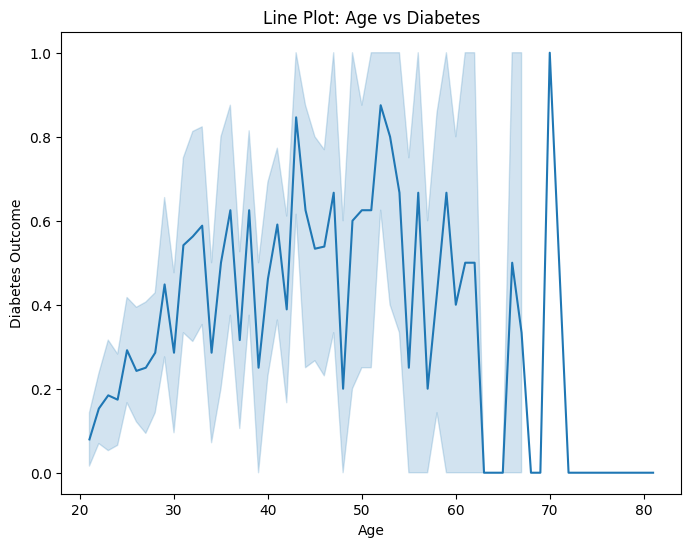

In [ ]:
# Line plot of Age vs Diabetes
plt.figure(figsize=(8, 6))
sns.lineplot(x=df['Age'], y=df['Outcome'])
plt.xlabel("Age")
plt.ylabel("Diabetes Outcome")
plt.title("Line Plot: Age vs Diabetes")
plt.show()

# Split Features and Target Variable

In [ ]:
# Splitting features and target variable
X = df.drop(columns=['Outcome'])  # Features
y = df['Outcome']  # Target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Feature Scaling

In [ ]:
# Standardization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression, LinearRegression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

# Evaluate Logistic Regression

Logistic Regression Accuracy: 0.71
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.81      0.78       100
           1       0.60      0.52      0.55        54

    accuracy                           0.71       154
   macro avg       0.68      0.66      0.67       154
weighted avg       0.70      0.71      0.70       154



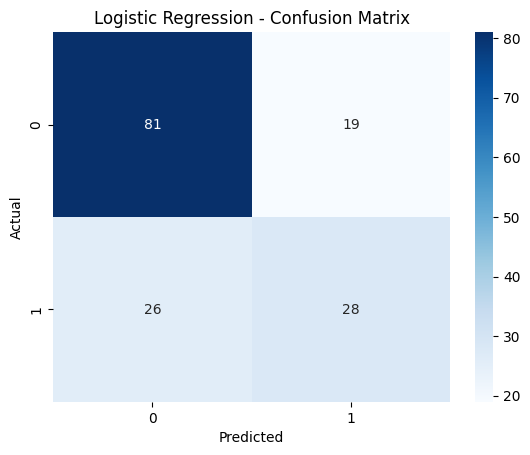

In [ ]:
# Predictions
y_pred_log = log_reg.predict(X_test)

# Accuracy
log_accuracy = accuracy_score(y_test, y_pred_log)
print(f"Logistic Regression Accuracy: {log_accuracy:.2f}")

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred_log))

# Confusion Matrix
cm_log = confusion_matrix(y_test, y_pred_log)
sns.heatmap(cm_log, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Logistic Regression - Confusion Matrix")
plt.show()

# Linear Regression Model

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

Linear Regression Mean Squared Error: 0.1644
R-squared Score: 0.2778
Classification Report (Thresholded at 0.5):
               precision    recall  f1-score   support

           0       0.76      0.81      0.78       100
           1       0.60      0.52      0.55        54

    accuracy                           0.71       154
   macro avg       0.68      0.66      0.67       154
weighted avg       0.70      0.71      0.70       154



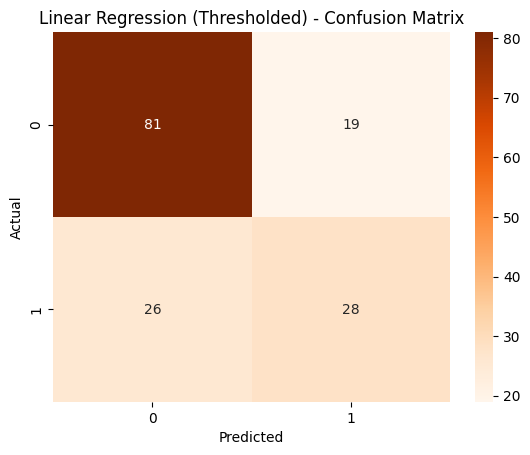

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, mean_squared_error, r2_score
# Predictions
y_pred_lin = lin_reg.predict(X_test)

# Convert predictions to binary classification
y_pred_lin_class = [1 if i >= 0.5 else 0 for i in y_pred_lin]

# Mean Squared Error
mse = mean_squared_error(y_test, y_pred_lin)
print(f"Linear Regression Mean Squared Error: {mse:.4f}")

# R-squared Score
r2 = r2_score(y_test, y_pred_lin)
print(f"R-squared Score: {r2:.4f}")

# Classification Report (after thresholding)
print("Classification Report (Thresholded at 0.5):\n", classification_report(y_test, y_pred_lin_class))

# Confusion Matrix
cm_lin = confusion_matrix(y_test, y_pred_lin_class)
sns.heatmap(cm_lin, annot=True, fmt="d", cmap="Oranges")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Linear Regression (Thresholded) - Confusion Matrix")
plt.show()

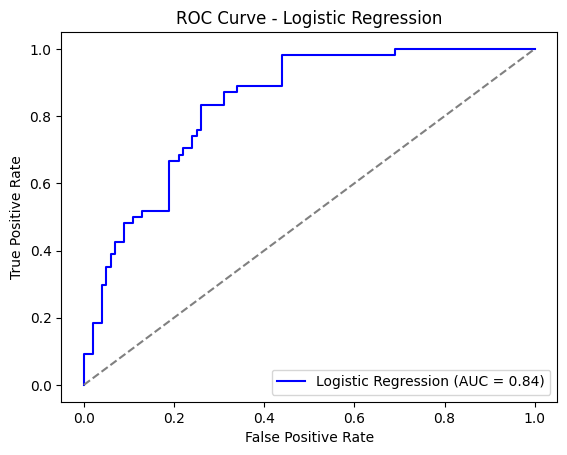

In [ ]:
# Compute ROC Curve for Logistic Regression
y_probs_log = log_reg.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_probs_log)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc:.2f})', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend()
plt.show()

# Random Forest Model

In [ ]:
# Hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 10, None]
}
rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best model
best_rf = grid_search.best_estimator_

Random Forest Accuracy: 0.76
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.86      0.82       100
           1       0.69      0.57      0.63        54

    accuracy                           0.76       154
   macro avg       0.74      0.72      0.72       154
weighted avg       0.75      0.76      0.75       154



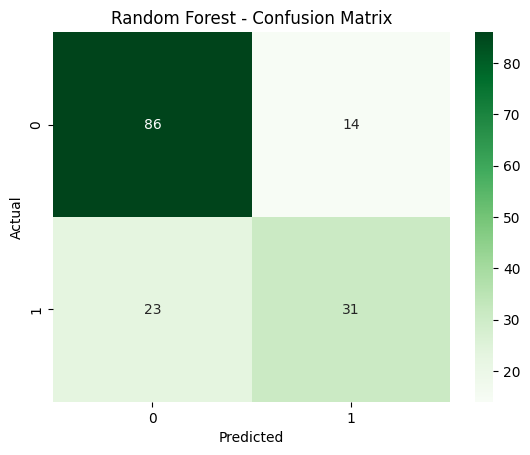

In [ ]:
# Predictions
y_pred_rf = best_rf.predict(X_test)

# Accuracy
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {rf_accuracy:.2f}")
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))


# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Greens")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Random Forest - Confusion Matrix")
plt.show()

# Model Comparision

In [ ]:
print(f"Model Comparison:")
print(f"1️⃣ Logistic Regression Accuracy: {log_accuracy:.2f}")
print(f"2️⃣ Linear Regression (Thresholded) MSE: {mse:.4f}")
print(f"3️⃣ Random Forest Accuracy: {rf_accuracy:.2f}")

Model Comparison:
1️⃣ Logistic Regression Accuracy: 0.71
2️⃣ Linear Regression (Thresholded) MSE: 0.1644
3️⃣ Random Forest Accuracy: 0.76


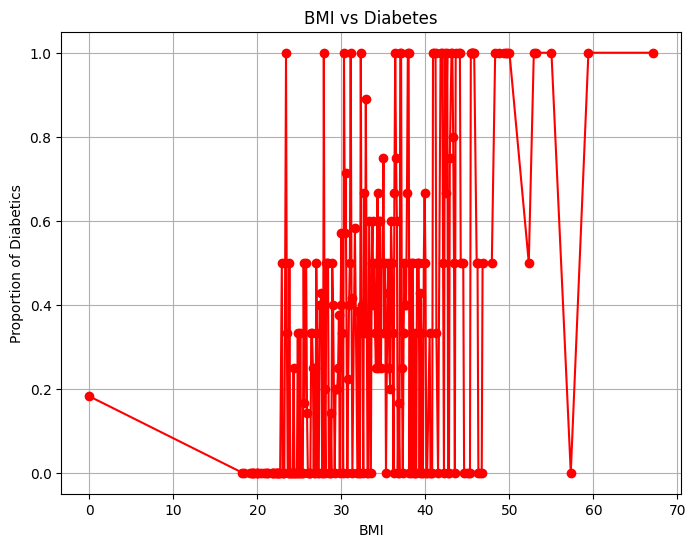

In [ ]:
# Plot BMI vs Diabetes (Line Plot)
plt.figure(figsize=(8, 6))
df_grouped_bmi = df.groupby('BMI')['Outcome'].mean()
plt.plot(df_grouped_bmi.index, df_grouped_bmi.values, marker='o', linestyle='-', color='r')
plt.xlabel("BMI")
plt.ylabel("Proportion of Diabetics")
plt.title("BMI vs Diabetes")
plt.grid()
plt.show()

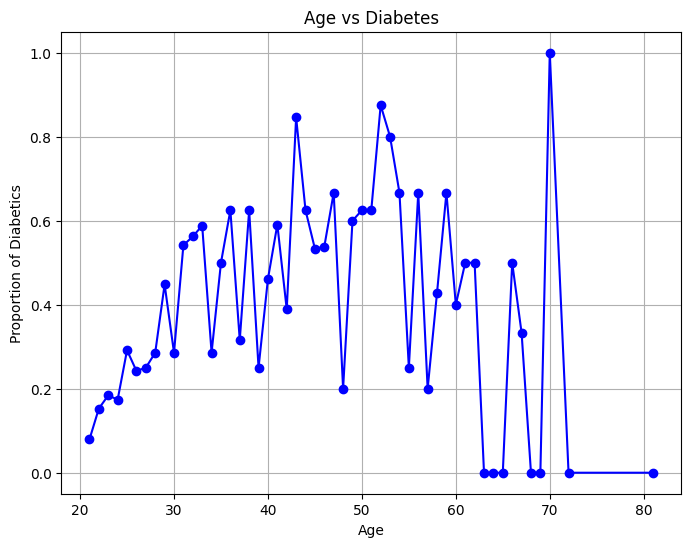

In [ ]:
plt.figure(figsize=(8, 6))
df_grouped = df.groupby('Age')['Outcome'].mean()
plt.plot(df_grouped.index, df_grouped.values, marker='o', linestyle='-', color='b')
plt.xlabel("Age")
plt.ylabel("Proportion of Diabetics")
plt.title("Age vs Diabetes")
plt.grid()
plt.show()

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BMI_Category_Normal,BMI_Category_Overweight,BMI_Category_Obese
0,6,148,72,35,0,33.6,0.627,50,1,False,False,True
1,1,85,66,29,0,26.6,0.351,31,0,False,True,False
2,8,183,64,0,0,23.3,0.672,32,1,True,False,False
3,1,89,66,23,94,28.1,0.167,21,0,False,True,False
4,0,137,40,35,168,43.1,2.288,33,1,False,False,True


# Prediction of Diabetes

In [ ]:
def predict_diabetes_rf():
    """
    Predict diabetes using the trained Random Forest model with user input.
    """
    print("\n🔹 Enter patient details for diabetes prediction 🔹")

    try:
        pregnancies = float(input("Pregnancies: "))
        glucose = float(input("Glucose Level: "))
        blood_pressure = float(input("Blood Pressure: "))
        skin_thickness = float(input("Skin Thickness: "))
        insulin = float(input("Insulin Level: "))
        bmi = float(input("BMI: "))
        dpf = float(input("Diabetes Pedigree Function: "))
        age = float(input("Age: "))

        # Create a DataFrame for user input with correct feature names
        input_df = pd.DataFrame([[pregnancies, glucose, blood_pressure, skin_thickness, insulin, bmi, dpf, age]],
                                columns=["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"])

        # Add BMI category (as done in training)
        input_df['BMI_Category'] = pd.cut(input_df['BMI'], bins=[0, 18.5, 25, 30, np.inf], labels=['Underweight', 'Normal', 'Overweight', 'Obese'])

        # One-hot encoding to match training data
        input_df = pd.get_dummies(input_df, columns=['BMI_Category'])

        # Ensure missing BMI categories are added as 0
        for col in ['BMI_Category_Normal', 'BMI_Category_Overweight', 'BMI_Category_Obese']:
            if col not in input_df.columns:
                input_df[col] = 0  # If the BMI category is missing, set it to 0

        # Match column order used in training
        input_df = input_df[X.columns]

        # Scale the input data
        input_scaled = scaler.transform(input_df)

        # Make prediction
        prediction = best_rf.predict(input_scaled)[0]

        # Display the result
        if prediction == 1:
            print("\n🔴 **The patient is predicted to have Diabetes.**")
        else:
            print("\n🟢 **The patient is predicted to be Non-Diabetic.**")

    except ValueError:
        print("⚠️ Invalid input! Please enter numerical values only.")

# Call the function to get user input and predict
predict_diabetes_rf()



🔹 Enter patient details for diabetes prediction 🔹
Pregnancies: 3
Glucose Level: 150
Blood Pressure: 80
Skin Thickness: 25
Insulin Level: 150
BMI: 33
Diabetes Pedigree Function: 0.8
Age: 50

🔴 **The patient is predicted to have Diabetes.**
